**Collaborative Filtering**



In [1]:
#importing neccessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
%matplotlib inline 

plt.style.use('seaborn-bright')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3344\1842971284.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [2]:
ratings_data = pd.read_csv("F:/ratings_small.csv/ratings_small.csv")
ratings_data = ratings_data.drop('timestamp', axis = 1)
ratings_data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [3]:
movie_names = pd.read_csv("F:/movies_metadata.csv/movies_metadata.csv", dtype={'column_name': str}, low_memory=False)
movie_names = movie_names[['title', 'genres']]
movie_names.head()

,title,genres
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [4]:
movie_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   45460 non-null  object
 1   genres  45466 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [5]:
# movie_data = ratings_data.merge(movie_names, on='movieId')
movie_data = pd.concat([ratings_data, movie_names], axis=1)
movie_data.head(10)

,userId,movieId,rating,title,genres
0,1,31,2.5,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,1,1029,3.0,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,1,1061,3.0,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,1,1129,2.0,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,1,1172,4.0,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"
5,1,1263,2.0,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
6,1,1287,2.0,Sabrina,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
7,1,1293,2.0,Tom and Huck,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,1,1339,3.5,Sudden Death,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
9,1,1343,2.0,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."


In [6]:
trend = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 

trend.head()

,rating,total number of ratings
title,,
!Women Art Revolution,4.5,1
#1 Cheerleader Camp,5.0,1
#Horror,2.5,1
#chicagoGirl,1.0,1
"$1,000 on the Black",4.5,1


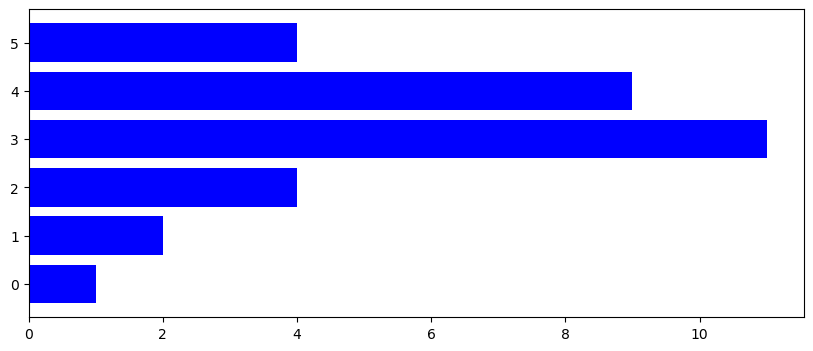

In [7]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

In [8]:
# Calculate mean rating of all movies and check the popular high rating movies
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Rapt                          5.0
My Sister's Kids in Africa    5.0
Nasu: Summer in Andalusia     5.0
Borderline Normal             5.0
Native Land                   5.0
Natsamrat                     5.0
Natural Born Killers          5.0
Natural City                  5.0
Naturally Native              5.0
Nature Calls                  5.0
Name: rating, dtype: float64

In [9]:
#Pivoting
movies_users = ratings_data.pivot(index=['userId'], columns=['movieId'], values='rating').fillna(0)
movies_users

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The dataset has dimensions of 671 × 9066 where most of the values are sparse. I am using only a small dataset but for the original large datasets (which has more than 100000 features), our system may run out of computational resources. To reduce the sparsity, I am using the "csr_matrix" function from the scipy library.

In [10]:
#Removing sparsity
from scipy.sparse import csr_matrix
mat_movies_users=csr_matrix(movies_users.values)
mat_movies_users

<671x9066 sparse matrix of type '<class 'numpy.float64'>'
	with 100004 stored elements in Compressed Sparse Row format>

In [11]:
# Cosine Similarity
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [12]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [13]:
def Recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    movie_index = process.extractOne(movie_name, movie_names['title'])[2]
    print('Movie Selected: ',movie_names['title'][movie_index], ', Index: ', movie_index)
    print('Searching for recommendations.....')
    distances, indices = model.kneighbors(data[movie_index], n_neighbors=n_recommendations)
    recc_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommend_frame = []
    for val in recc_movie_indices:
#print(movie_names['title'][val[0]])
        recommend_frame.append({'Title':movie_names['title'][val[0]],'Distance':val[1]})
    
    df = pd.DataFrame(recommend_frame, index = range(1,n_recommendations))
     
    return df

In [14]:
n_recommendations = 10
Recommender('Jumanji', mat_movies_users, model_knn, n_recommendations)

Movie Selected:  Jumanji , Index:  1
Searching for recommendations.....


,Title,Distance
1,The Amazing Panda Adventure,0.461603
2,Nell,0.452125
3,Billy's Holiday,0.448570
4,Desperado,0.441926
5,Colonel Chabert,0.434887
6,Brother Minister: The Assassination of Malcolm X,0.428748
7,Batman Forever,0.426903
8,Red Rock West,0.419258
9,Muriel's Wedding,0.418472


In [15]:
n_recommendations = 10
Recommender('Toy Story', mat_movies_users, model_knn, n_recommendations)

Movie Selected:  Toy Story , Index:  0
Searching for recommendations.....


,Title,Distance
1,Frankie Starlight,0.887183
2,Made in America,0.885979
3,The Stars Fell on Henrietta,0.877353
4,Carrington,0.869415
5,White Man's Burden,0.847254
6,The Swan Princess,0.842476
7,"The Adventures of Priscilla, Queen of the Desert",0.837181
8,Roula,0.805907
9,Star Trek: Generations,0.628148


In [16]:
n_recommendations = 10
Recommender('Waiting to Exhale', mat_movies_users, model_knn, n_recommendations)

Movie Selected:  Waiting to Exhale , Index:  3
Searching for recommendations.....


,Title,Distance
1,Farewell My Concubine,0.662311
2,Billy Madison,0.657160
3,The Jungle Book,0.654465
4,Ed Wood,0.651353
5,Losing Isaiah,0.649297
6,Natural Born Killers,0.639235
7,House Party 3,0.621144
8,Frankie Starlight,0.609298
9,Romper Stomper,0.607587


In [17]:
n_recommendations = 10
Recommender('GoldenEye', mat_movies_users, model_knn, n_recommendations)

Movie Selected:  GoldenEye , Index:  9
Searching for recommendations.....


,Title,Distance
1,August,0.802881
2,The Favor,0.801469
3,Mr. Wrong,0.796227
4,Schindler's List,0.795844
5,Trial by Jury,0.795805
6,Kika,0.794186
7,Waterworld,0.790204
8,Canadian Bacon,0.782937
9,Man of the House,0.737213


In [18]:
n_recommendations = 10
Recommender('Father of the Bride Part II', mat_movies_users, model_knn, n_recommendations)

Movie Selected:  Father of the Bride Part II , Index:  4
Searching for recommendations.....


,Title,Distance
1,Reckless,0.706879
2,Beautiful Girls,0.700975
3,Naked in New York,0.697227
4,The Neverending Story III: Escape from Fantasia,0.695027
5,Kids in the Hall: Brain Candy,0.689966
6,Farewell My Concubine,0.687138
7,A Pyromaniac's Love Story,0.679077
8,No Escape,0.663107
9,Stargate,0.661820


The above recommendation system employs an item-to-item collaborative approach. This system is the simplest implementation of a recommendation system and requires a significant amount of tuning. Additionally, the system's initial recommendations will always be popular movies voted on by a larger number of people; a change could be made to address this limitation.